<a href="https://colab.research.google.com/github/tanongsakintean/machineLearning-basic/blob/main/HierachicalVSKmean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercises
ใหนักศึกษาทดลองจัดกลุ่มข้อมูลกับชุดข้อมูล bank_cluster.csv โดยมีกระบวนการดังนี้
1.  สำรวจและแสดงรายละเอียดของชุดข้อมูล ทำการ preprocess ตามที่เห็นสมควร
2.  ทำการหาจำนวนกลุ่มที่เหมาะสมสำหรับชุดข้อมูลนี้ด้วย elblow
3.  แสดง centroid ของแต่ละ cluster จากโมเดลที่ดีที่สุดตามค่า k ที่เลือก
4.  แสดงค่า SSE ที่ได้
5.  plot graph ที่ได้จากการจัดกลุ่มข้อมูลโดยใช้ทุก attribute ที่มี
6.  บันทึกข้อมูลการจัดกลุ่มลงในไฟล์ new_bankcluster.csv  
7.   พิมพ์ข้อความเพื่ออธิบายผลลัพธ์ที่ได้จากการจัดกลุ่ม (พิมพ์บรรยายเอง)
8. โมเดลที่ดีที่สุดมาจัดกลุ่มชุดข้อมูลใหม่เพื่อพิจารณาว่าลูกค้าคนใหม่ 5 คนว่าควรอยู่กลุ่มใด

และทดลองใช้ชุดข้อมูลเดียวกันนี้จำแนกด้วย  Hierarchical Clustering   แล้วพิจารณาการตัดกลุ่มเพื่อเปรียบเทียบกัน

In [ ]:
import pandas as pd
import os # use commandline
import pandas as pd
from google.colab import files
import io
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['bank_cluster.csv']))
df.head(20)

Saving bank_cluster.csv to bank_cluster.csv


,age,sex,region,income,married,children,car,save_act,current_act,mortgage
0,48,FEMALE,INNER_CITY,17546.00,NO,1,NO,NO,NO,NO
1,40,MALE,TOWN,30085.10,YES,3,YES,NO,YES,YES
2,51,FEMALE,INNER_CITY,16575.40,YES,0,YES,YES,YES,NO
3,23,FEMALE,TOWN,20375.40,YES,3,NO,NO,YES,NO
4,57,FEMALE,RURAL,50576.30,YES,0,NO,YES,NO,NO
5,57,FEMALE,TOWN,37869.60,YES,2,NO,YES,YES,NO
6,22,MALE,RURAL,8877.07,NO,0,NO,NO,YES,NO
7,58,MALE,TOWN,24946.60,YES,0,YES,YES,YES,NO
8,37,FEMALE,SUBURBAN,25304.30,YES,2,YES,NO,NO,NO
9,54,MALE,TOWN,24212.10,YES,2,YES,YES,YES,NO


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['sex'] = encoder.fit_transform(df['sex']) # แปลงประเภทให้เป็น ตัวเลขแล้วเก็บใน sex
df['region'] = encoder.fit_transform(df['region']) # แปลงประเภทให้เป็น ตัวเลขแล้วเก็บใน region
df['married'] = encoder.fit_transform(df['married']) # แปลงประเภทให้เป็น ตัวเลขแล้วเก็บใน married
df['car'] = encoder.fit_transform(df['car']) # แปลงประเภทให้เป็น ตัวเลขแล้วเก็บใน car
df['save_act'] = encoder.fit_transform(df['save_act']) # แปลงประเภทให้เป็น ตัวเลขแล้วเก็บใน save_act
df['current_act'] = encoder.fit_transform(df['current_act']) # แปลงประเภทให้เป็น ตัวเลขแล้วเก็บใน current_act
df['mortgage'] = encoder.fit_transform(df['mortgage']) # แปลงประเภทให้เป็น ตัวเลขแล้วเก็บใน mortgage
df.head(50)

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,Cluster
0,48,0,0,17546.00,0,1,0,0,0,0,2
1,40,1,3,30085.10,1,3,1,0,1,1,0
2,51,0,0,16575.40,1,0,1,1,1,0,2
3,23,0,3,20375.40,1,3,0,0,1,0,2
4,57,0,1,50576.30,1,0,0,1,0,0,1
5,57,0,3,37869.60,1,2,0,1,1,0,0
6,22,1,1,8877.07,0,0,0,0,1,0,2
7,58,1,3,24946.60,1,0,1,1,1,0,0
8,37,0,2,25304.30,1,2,1,0,0,0,0
9,54,1,3,24212.10,1,2,1,1,1,0,0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

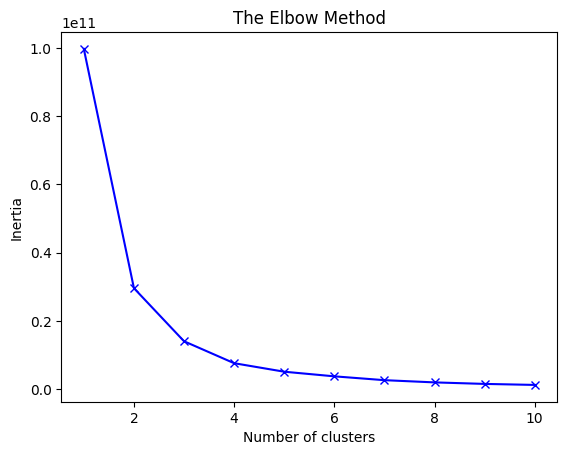

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
points = df.iloc[:, 0:10].values
inertia = [] # เก็บ sse แต่ละ K
for i in range(1, 11): # รัน K 10 รอบ
    kmeans = KMeans(n_clusters = i,  max_iter = 300, random_state = 0) # จำกัด รอบ 300 รอบ ในแต่ละ K
    kmeans.fit(points)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia,'bx-') #ิbx- คือสัญลักษณะของกราฟในแต่ละคลัสเตอร์
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0) #แบ่ง 5 กลุ่ม
kmeans.fit(points) # สร้าง model


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(points)
df['Cluster'] = kmeans.labels_
df


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,age,sex,region,income,married,children,car,save_act,current_act,mortgage,Cluster
0,48,0,0,17546.00,0,1,0,0,0,0,2
1,40,1,3,30085.10,1,3,1,0,1,1,0
2,51,0,0,16575.40,1,0,1,1,1,0,2
3,23,0,3,20375.40,1,3,0,0,1,0,2
4,57,0,1,50576.30,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
595,61,0,0,47025.00,0,2,1,1,1,1,1
596,30,0,0,9672.25,1,0,1,1,1,0,2
597,31,0,3,15976.30,1,0,1,1,0,0,2
598,29,1,0,14711.80,1,0,0,1,0,1,2


In [ ]:
centers = kmeans.cluster_centers_  #5 clusters and 4 attributes
centers

array([[4.67873303e+01, 4.84162896e-01, 1.29864253e+00, 3.07320385e+04,
        6.24434389e-01, 1.00000000e+00, 5.61085973e-01, 6.42533937e-01,
        7.46606335e-01, 3.66515837e-01],
       [5.90566038e+01, 5.00000000e-01, 1.13207547e+00, 4.92589066e+04,
        6.79245283e-01, 1.07547170e+00, 5.09433962e-01, 1.00000000e+00,
        8.01886792e-01, 3.20754717e-01],
       [3.23699634e+01, 5.12820513e-01, 1.21611722e+00, 1.64878906e+04,
        6.81318681e-01, 9.96336996e-01, 4.32234432e-01, 6.08058608e-01,
        7.50915751e-01, 3.44322344e-01]])

In [ ]:
kmeans.inertia_

14071731814.388165

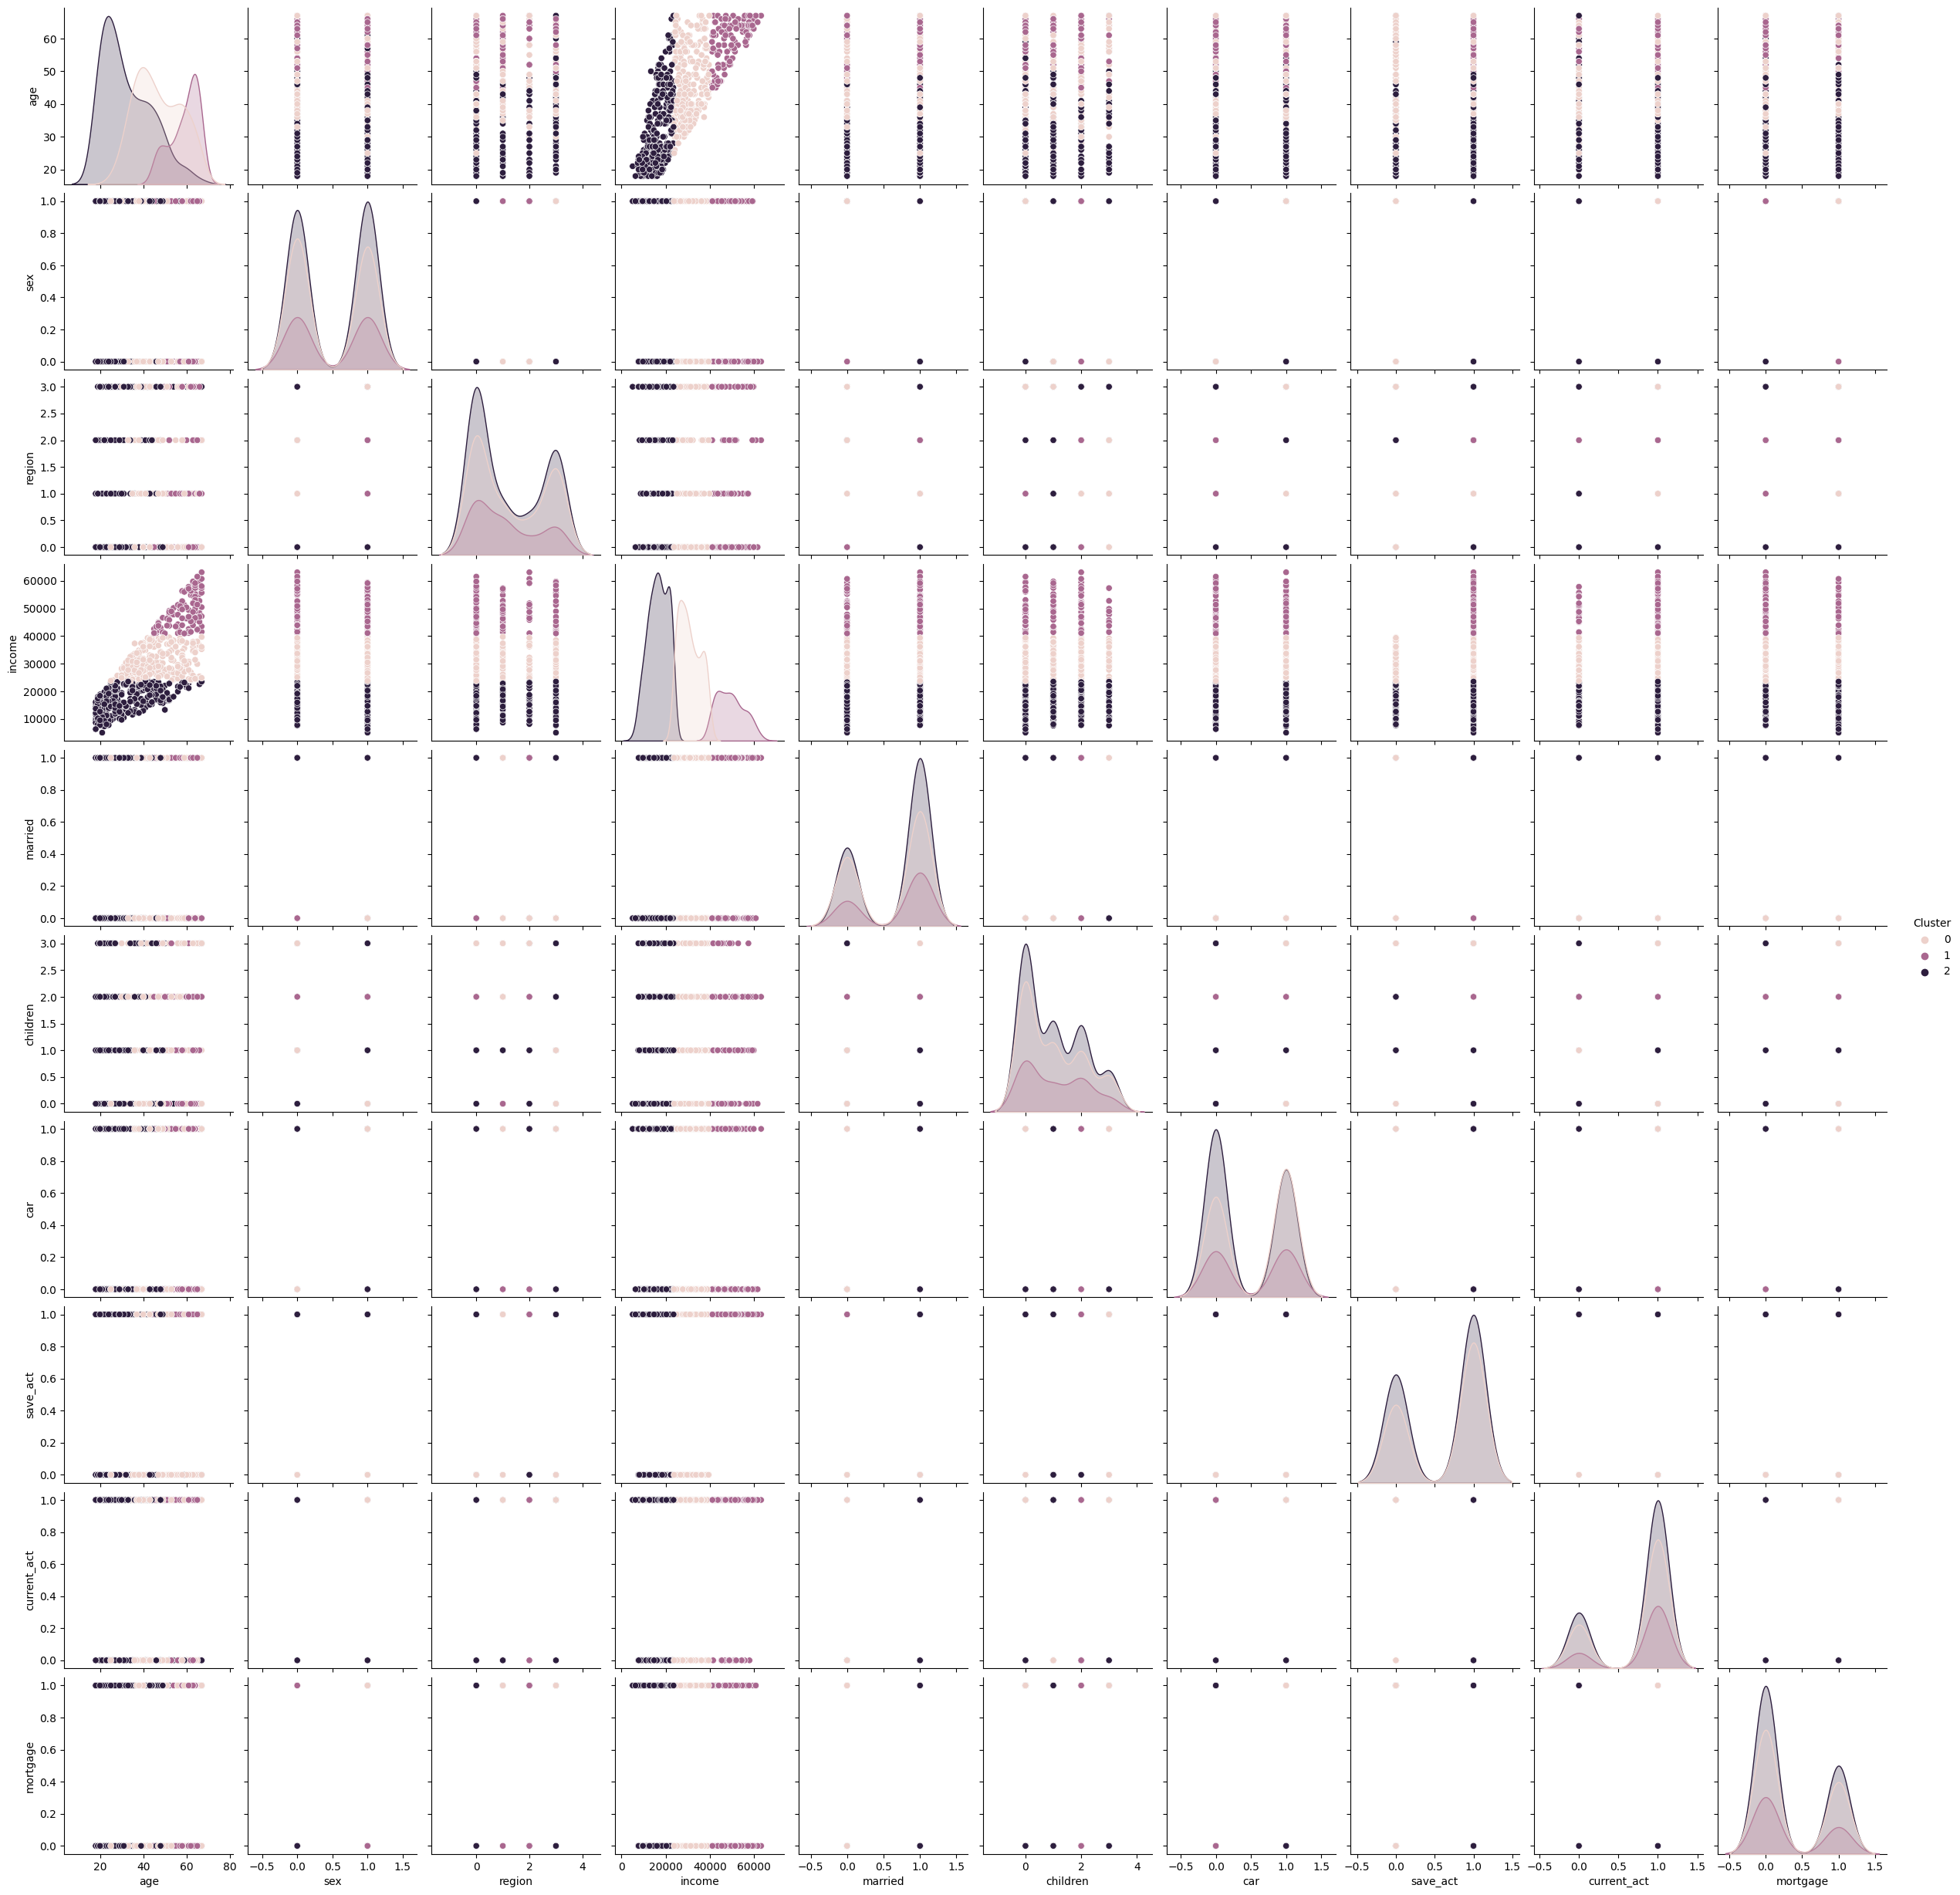

In [ ]:
sns.pairplot(df,hue='Cluster')

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(df) # เอาattibute ทีมี 9 ยุบรวมให้ เหลือ 3
pca_2d = pca.transform(df)
newdf = pd.DataFrame(pca_2d);
newdf['Cluster'] = kmeans.labels_
newdf

,0,1,Cluster
0,-9978.022999,13.999353,2
1,2561.065899,-4.539132,0
2,-10948.620118,17.814431,2
3,-7148.645040,-13.378030,2
4,23052.272894,-4.801082,1
...,...,...,...
595,19500.977532,2.180790,1
596,-17851.785344,2.629154,2
597,-11547.736742,-1.668133,2
598,-12812.237981,-2.617800,2


/usr/local/lib/python3.10/dist-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


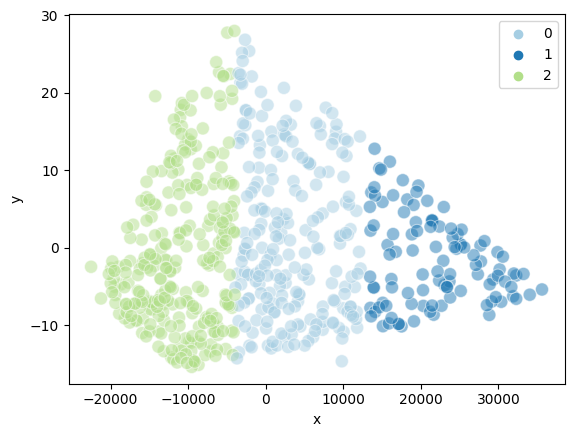

In [ ]:
sns.scatterplot(x=newdf[0], y=newdf[1], hue="Cluster", data=newdf, palette='Paired', s=90, alpha = 0.5,cmap = 'viridis');
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best');

In [ ]:
df.to_csv('new_bankcluster.csv',index=False)

In [ ]:
newcenters = pd.DataFrame(centers,
                         columns=['age', 'sex', 'region','income','married','children','car','save_act','current_act','mortgage'])

newcenters.round(0).astype('int') #ปัดเศษขึ้นลงตามค่าที่ใกล้เคียง
#ถ้าเราสนใจลูกค้าคือ กลุ่ม 1 อายุ 59 เพศหญิง เป็นกลุ่มคน ชนบท มีรายได้ 49259 เป็นคนที่แต่งงานแล้ว มีลูก มีรถ มีบัญชีเงินฝากออมทรัพย์ มีบัญชีเงินฝากประจำ  ไม่มีการจำนอง

,age,sex,region,income,married,children,car,save_act,current_act,mortgage
0,47,0,1,30732,1,1,1,1,1,0
1,59,0,1,49259,1,1,1,1,1,0
2,32,1,1,16488,1,1,0,1,1,0


In [ ]:
X=[[47,0 ,1 ,30732,1,1,1,1,1,0],[59,0 ,1 ,40259,1,1,1,1,1,0],[40,0 ,1 ,12288,0,1,1,1,0,1],[50,0 ,0 ,11188,0,0,0,0,1,1],[29,0 ,1 ,10088,0,0,1,0,0,1]]  #two unseen data
C_clustered=kmeans.predict(X)
print(C_clustered)

[0 1 2 2 2]


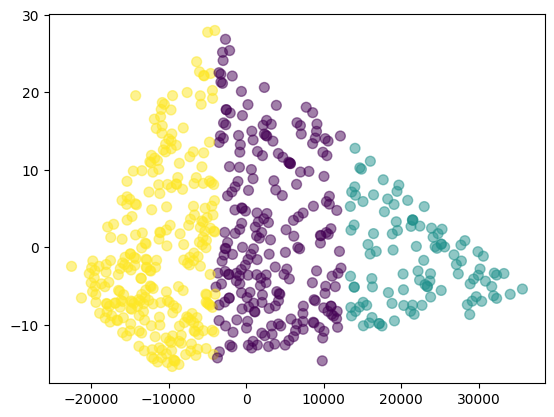

In [ ]:
xK = newdf.iloc[:, 0]

yK = newdf.iloc[:, 1]
plt.scatter(x, y, c=kmeans.labels_, s=50, alpha=0.5, cmap='viridis') #ลองปรับค่า cmap = rainbow

centers = kmeans.cluster_centers_ #ดึงค่า centroid ของแต่ละ cluster มาเก็บไว้ที่ centers เป็น array 2 มิติ 5 แถว  2 คอลัมน์   คอลลัมน์ x,y
# plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100) #0 คือ แกน x ,1 คือแกน y

# ทดลองด้วย Hierachical Clustering

In [ ]:
X = df.copy() # เอา data set ข้างบน มา copy
X = X.drop('Cluster', axis=1)
X

,age,sex,region,income,married,children,car,save_act,current_act,mortgage
0,48,0,0,17546.00,0,1,0,0,0,0
1,40,1,3,30085.10,1,3,1,0,1,1
2,51,0,0,16575.40,1,0,1,1,1,0
3,23,0,3,20375.40,1,3,0,0,1,0
4,57,0,1,50576.30,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
595,61,0,0,47025.00,0,2,1,1,1,1
596,30,0,0,9672.25,1,0,1,1,1,0
597,31,0,3,15976.30,1,0,1,1,0,0
598,29,1,0,14711.80,1,0,0,1,0,1


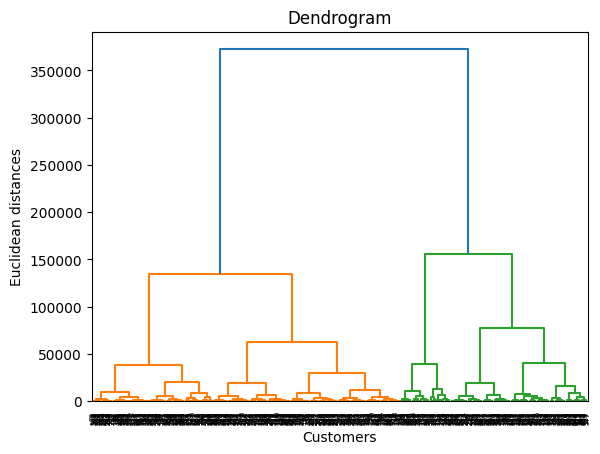

In [ ]:

# First thing we're going to do is to import scipy library. scipy is #an open source Python library that contains tools to do #hierarchical clustering and building dendrograms. Only import the #needed tool.
import scipy.cluster.hierarchy as sch
#Lets create a dendrogram variable linkage is actually the algorithm #itself of hierarchical clustering and then in linkage we have to #specify on which data we apply and engage. This is X dataset
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward")) #เป็น หาค่าน้อยที่สุดในการจัดกลุ่ม
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:

# There are two algorithms for hierarchical clustering: #Agglomerative Hierarchical Clustering and
# Divisive Hierarchical Clustering. We choose Euclidean distance and ward method for our algorithm class
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')
# AgglomerativeClustering  จัดกลุ่มให้ดูว่า ในแต่ละ instance อยู๋กลุ่มใด
# Lets try to fit the hierarchical clustering algorithm  to dataset #X while creating the clusters vector that tells for each customer #which cluster the customer belongs to.
y_hc=hc.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
y_hc

array([0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 2, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 2, 0, 0, 0, 1, 1, 2, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 2, 1, 0, 1, 1, 2, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 2,
       1, 1, 0, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1, 0, 2, 0, 2, 0, 1, 0, 0, 2,
       0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 2,
       1, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X) # เอาattibute ทีมี 9 ยุบรวมให้ เหลือ 3
pca_2d = pca.transform(X)
newHi = pd.DataFrame(pca_2d);
newHi['Cluster'] = y_hc
newHi

,0,1,Cluster
0,-9978.022971,14.005949,0
1,2561.065860,-4.550013,1
2,-10948.620092,17.820860,0
3,-7148.645011,-13.371878,0
4,23052.272907,-4.793065,2
...,...,...,...
595,19500.977542,2.187787,1
596,-17851.785322,2.631951,0
597,-11547.736715,-1.663073,0
598,-12812.237955,-2.613287,0


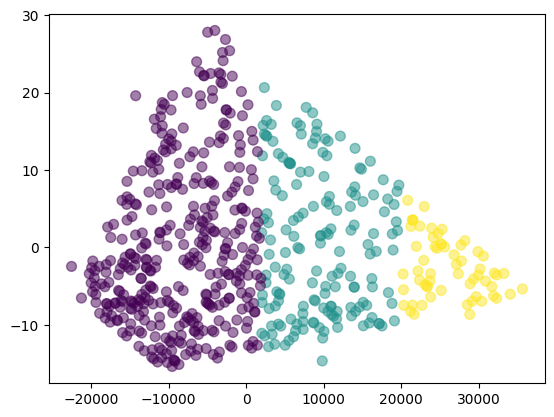

In [ ]:
xH = newHi.iloc[:, 0]

yH = newHi.iloc[:, 1]
plt.scatter(xH, yH, c=y_hc, s=50, alpha=0.5, cmap='viridis') #ลองปรับค่า cmap = rainbow
# plt.xlabel('Annual Income (k$)')
# plt.ylabel('Spending Score')
centers = y_hc #ดึงค่า centroid ของแต่ละ cluster มาเก็บไว้ที่ centers เป็น array 2 มิติ 5 แถว  2 คอลัมน์   คอลลัมน์ x,y
# plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100) #0 คือ แกน x ,1 คือแกน y

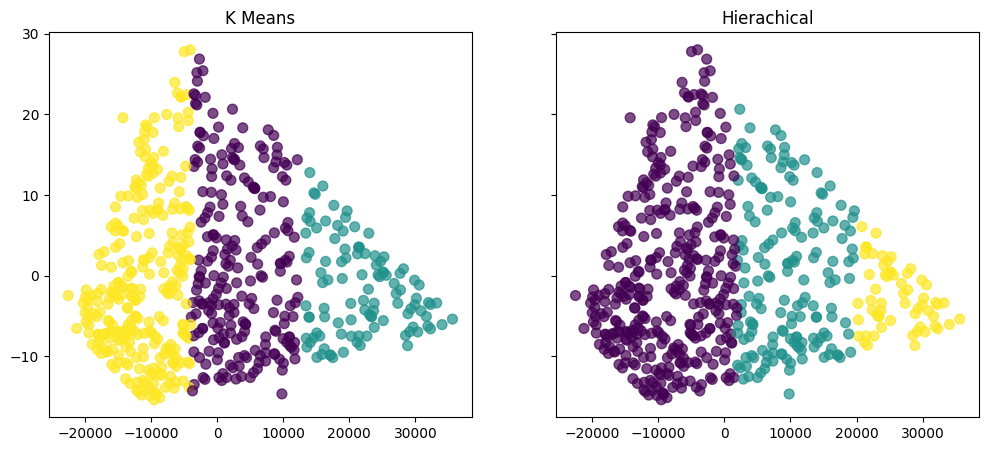

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(12,5)) # plot 1 แถว 2 column figsize มาตรฐานจะเป็น  8x6 ดังนั้นจึงได้ภาพขนาด 640x480
ax1.set_title('K Means')
ax1.scatter(xK, yK, c=kmeans.labels_, s=50, alpha=0.7, cmap='viridis') #kmeans
# ax1.scatter(centers[:, 0], centers[:, 1], c='red', s=100)
ax2.set_title("Hierachical")
ax2.scatter(xH, yH, c=y_hc, s=50, alpha=0.7,cmap='viridis') #Hierachical